In [1]:
!pip install heartpy hrv-analysis


In [2]:
import pandas
import heartpy as hp
import numpy as np
%matplotlib inline
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt
from hrvanalysis import get_time_domain_features


In [3]:
### 
numerical_columns = ["col {}".format(el) for el in range(50)]



In [4]:
heartrate_file = pandas.read_csv("results/mori1__2022-05-23T06_24_10.222504.csv",
                                 names = ["time","rri", "error"]+ numerical_columns)

In [5]:
list(heartrate_file["rri"][heartrate_file["rri"]!=0])

[724,
 744,
 808,
 756,
 768,
 840,
 800,
 776,
 792,
 824,
 824,
 772,
 752,
 800,
 808,
 788,
 744,
 808,
 780,
 848,
 784,
 784,
 776,
 816,
 716,
 784,
 756,
 840,
 816,
 824,
 808,
 740,
 808,
 776,
 756,
 808,
 772,
 784,
 792,
 780,
 792,
 808,
 764,
 744,
 800,
 848,
 756,
 808,
 784,
 816,
 808,
 748,
 760,
 824,
 732,
 808,
 792,
 840,
 732,
 832,
 784,
 788,
 744,
 816,
 724,
 808,
 748,
 832,
 816,
 832,
 740,
 840,
 816,
 700,
 748,
 784,
 732,
 780,
 736,
 756,
 792,
 772,
 776,
 808,
 836,
 728,
 816,
 740,
 800,
 772,
 824,
 804,
 768,
 812,
 792,
 824,
 764,
 824,
 764,
 724,
 748,
 796,
 784,
 764,
 788,
 792,
 772,
 816,
 764,
 756,
 756,
 748,
 764,
 756,
 772,
 816,
 740,
 764,
 748,
 716,
 740,
 800,
 788,
 796,
 824,
 852,
 816,
 844,
 776,
 764,
 788,
 816,
 804,
 808,
 796,
 824,
 888,
 796,
 824,
 780,
 796,
 856,
 756,
 788,
 824,
 872,
 856,
 852,
 776,
 836,
 784,
 848,
 764,
 780,
 800,
 816,
 804,
 816,
 796,
 824,
 856,
 764,
 856,
 724,
 764,
 764,
 796

In [6]:
only_time = heartrate_file[numerical_columns].stack()


from ipywidgets import interact, IntSlider
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(only_time), value = len(only_time)), offset = IntSlider(min=0, max = len(only_time), value = 0)):

    only_time.iloc[ffrom+offset:tto+offset].plot(ylim = (0,2500))

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=96850, description='t…

In [7]:
sample_rate = 250

#hp.plotter(working_data, measures)
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(only_time), value = len(only_time)), offset = IntSlider(min=0, max = len(only_time), value = 0)):
    filtered_ppg = hp.filter_signal(np.array(only_time)[ffrom+offset:tto+offset], 
                                cutoff = [0.8, 2.5], 
                                #cutoff = [0.1, 5], 
                                filtertype = 'bandpass',
                                sample_rate = sample_rate, 
                                order = 3,
                                return_top = False)

    working_data, measures = hp.process(filtered_ppg, 250.0)
    hp.plotter(working_data, measures)
    #only_time.iloc[ffrom+offset:tto+offset].plot(ylim = (0,2500))

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=96850, description='t…

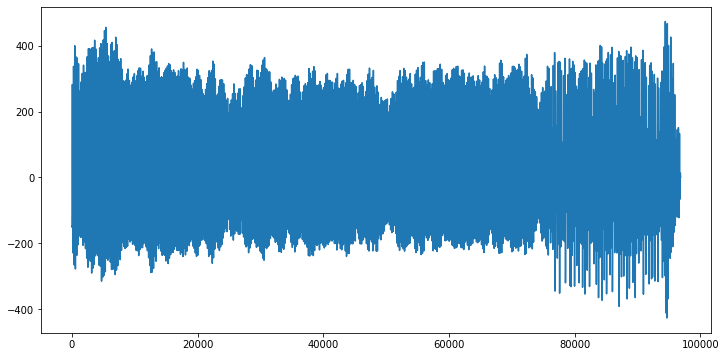

In [8]:
import matplotlib.pyplot as plt

sample_rate = 250
just_heart = np.array(only_time)
filtered_ppg = hp.filter_signal(just_heart, 
                                cutoff = [0.8, 2.5], 
                                filtertype = 'bandpass',
                                sample_rate = sample_rate, 
                                order = 3,
                                return_top = False)

#And let's plot the same segment as under 'zoomed in!' above
plt.figure(figsize=(12,6))
plt.plot(filtered_ppg)
#plt.plot(filtered_ppg[0:((2*60)*32)])
plt.show()



bpm: 76.867930
ibi: 780.559596
sdnn: 56.260397
sdsd: 58.262381
rmssd: 71.908061
pnn20: 0.459514
pnn50: 0.198381
hr_mad: 23.000000
sd1: 50.846584
sd2: 61.141937
s: 9766.767508
sd1/sd2: 0.831616
breathingrate: 0.284701


<Figure size 864x432 with 0 Axes>

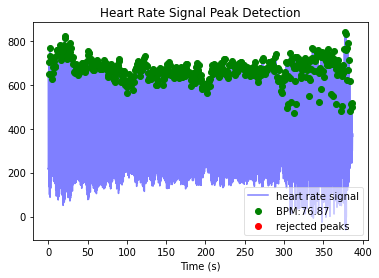

In [9]:
wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)
plt.figure(figsize=(12,6))
hp.plotter(wd, m)


for key in m.keys():
    print('%s: %f' %(key, m[key]))


In [10]:
wd["RR_list"]

array([754., 772., 765., 802., 825., 800., 783., 801., 810., 811., 776.,
       775., 773., 801., 808., 762., 771., 804., 828., 804., 779., 776.,
       795., 743., 761., 792., 819., 837., 811., 774., 782., 788., 776.,
       760., 780., 806., 790., 775., 783., 808., 794., 763., 763., 769.,
       803., 830., 795., 788., 789., 805., 775., 762., 779., 779., 805.,
       787., 794., 801., 818., 781., 770., 771., 772., 766., 768., 792.,
       820., 794., 806., 808., 815., 772., 739., 751., 762., 755., 756.,
       749., 778., 783., 771., 780., 799., 789., 779., 790., 781., 776.,
       793., 809., 797., 773., 804., 806., 806., 806., 796., 763., 750.,
       751., 762., 768., 793., 789., 790., 784., 787., 755., 756., 770.,
       766., 760., 762., 758., 779., 792., 763., 725., 732., 731., 765.,
       800., 826., 826., 833., 837., 836., 788., 766., 788., 797., 819.,
       805., 802., 823., 852., 840., 792., 799., 806., 808., 794., 783.,
       826., 865., 854., 821., 802., 810., 823., 81

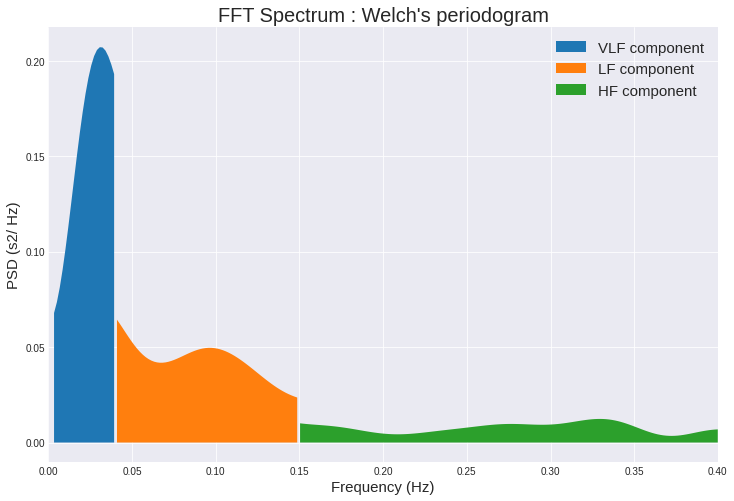

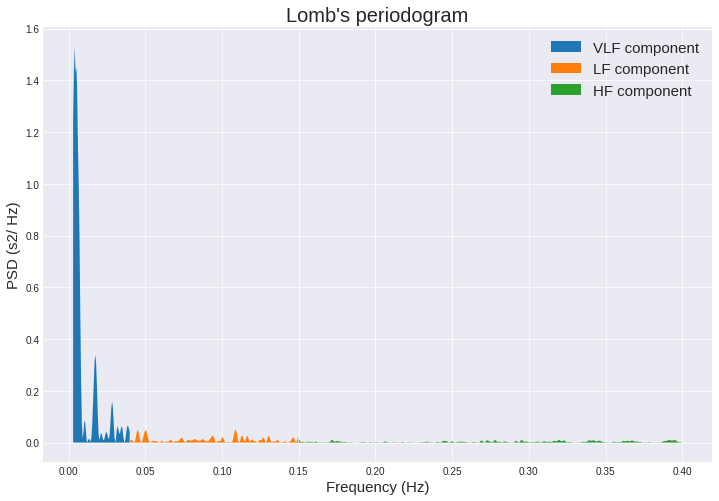

In [11]:
from hrvanalysis import plot_psd

# nn_intervals_list contains integer values of NN-interval
nn_intervals_list = wd["RR_list"]

plot_psd(nn_intervals_list, method="welch")
plot_psd(nn_intervals_list, method="lomb")

In [12]:
wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)

filtered_ppg


array([-147.2523506 , -148.46660171, -149.429699  , ...,    0.6248154 ,
          0.52784054,    0.44194698])

In [13]:
filtered_ppg[340]

-193.64620001998694

In [14]:
len(wd["RR_list"])

495

In [15]:
from hrvanalysis import get_time_domain_features

sum(wd["RR_list"][0:53]) # first 60 s
skup = wd["RR_list"][0:53]
time_domain_features = get_time_domain_features(skup)
print(time_domain_features)

print("S2 ratio",time_domain_features["sdnn"]/time_domain_features["rmssd"])

{'mean_nni': 788.2075471698113, 'sdnn': 21.04058211625813, 'sdsd': 22.733819592282284, 'nni_50': 1, 'pnni_50': 1.9230769230769231, 'nni_20': 22, 'pnni_20': 42.30769230769231, 'rmssd': 22.738902618809295, 'median_nni': 788.0, 'range_nni': 94.0, 'cvsd': 0.02884887705079336, 'cvnni': 0.026694215491602176, 'mean_hr': 76.17504696452785, 'max_hr': 80.75370121130551, 'min_hr': 71.68458781362007, 'std_hr': 2.004092781261068}
S2 ratio 0.9253121168148924


In [16]:
sum(wd["RR_list"][53:]) # last 60 s
skup2 = wd["RR_list"][53:]
time_domain_features2 = get_time_domain_features(skup2)
print(time_domain_features2)
print(time_domain_features2["sdnn"]/time_domain_features2["rmssd"])

{'mean_nni': 779.6425339366516, 'sdnn': 59.099392056182865, 'sdsd': 75.7046023720246, 'nni_50': 97, 'pnni_50': 21.99546485260771, 'nni_20': 205, 'pnni_20': 46.48526077097506, 'rmssd': 75.70489609342982, 'median_nni': 793.0, 'range_nni': 328.0, 'cvsd': 0.09710205998019739, 'cvnni': 0.07580319118528861, 'mean_hr': 77.45746915911725, 'max_hr': 105.4481546572935, 'min_hr': 66.88963210702342, 'std_hr': 6.631715721411886}
0.7806548203070832


In [17]:
def s2_t(signal_peaks, window_size,t):
    absolute_times = np.cumsum(signal_peaks)
    
    
    
    filtered_times = (peak for peak,time in zip(signal_peaks,absolute_times) if t-window_size<time<=t)
    return s2(filtered_times)

import functools
    
@functools.lru_cache    
def s2(filtered_times):
    time_domain_features = get_time_domain_features(list(filtered_times))
    return time_domain_features["sdnn"]/time_domain_features["rmssd"]

In [18]:
wszystkie_timingi = wd["RR_list"]
@interact
def change_window(window_size =  30000):
    #window_size = 30000
    wykres_czasy = np.array([[tt, s2_t(wszystkie_timingi,window_size,tt)] for tt in range(window_size, int(sum(wszystkie_timingi)),1000)])
    plt.plot(wykres_czasy[:,0], wykres_czasy[:,1],"*")
    plt.title(f"S2 with {window_size} window size")

interactive(children=(IntSlider(value=30000, description='window_size', max=90000, min=-30000), Output()), _do…

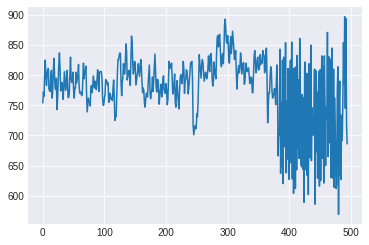

In [19]:
plt.plot(wd["RR_list"])

In [20]:
def gen_s2_graph(cs_filename, window_size = 30000):
    numerical_columns = ["col {}".format(el) for el in range(50)]
    heartrate_file = pandas.read_csv(cs_filename,
                                 names = ["time","rri", "error"]+ numerical_columns)
    

    sample_rate = 250
    only_time = heartrate_file[numerical_columns].stack()
    just_heart = np.array(only_time)
    filtered_ppg = hp.filter_signal(just_heart, 
                                    cutoff = [0.8, 2.5], 
                                    filtertype = 'bandpass',
                                    sample_rate = sample_rate, 
                                    order = 3,
                                    return_top = False)
    
    wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)
    wszystkie_timingi = wd["RR_list"]
    
    timingi_raw = np.array(heartrate_file["rri"][heartrate_file["rri"]!=0])
    wykres_czasy = np.array([[tt, s2_t(wszystkie_timingi,window_size,tt)] for tt in range(window_size, int(sum(wszystkie_timingi)),1000)])
    
    
    wykres_czasy2 = np.array([[tt, s2_t(timingi_raw,window_size,tt)] for tt in range(window_size, int(sum(timingi_raw)),1000)])
    #%debug
    plt.plot(wykres_czasy[:,0], wykres_czasy[:,1],"*", wykres_czasy2[:,0], wykres_czasy2[:,1],"r*")
    plt.ylim([0,3])
    plt.title(f"S2 with {window_size} window size")
    plt.legend(["RRi calculated by python", "RRi calculated by microcontroller"])

In [21]:
WS = 30000

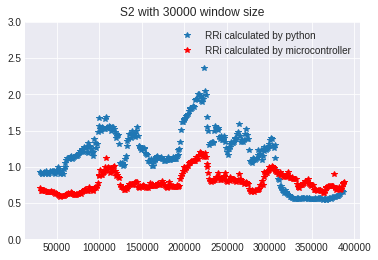

In [22]:
gen_s2_graph("results/mori1__2022-05-23T06_24_10.222504.csv",WS)

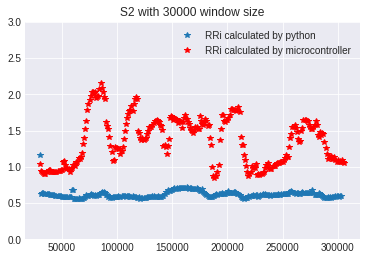

In [23]:
gen_s2_graph("results/mori1_rel__2022-05-23T06_31_23.564297.csv",WS)

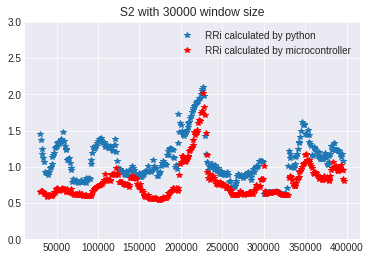

In [24]:
gen_s2_graph("results/mori2__2022-05-23T06_38_23.139399.csv",WS)

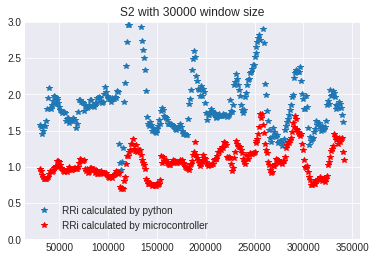

In [25]:
gen_s2_graph("results/mori2_rel__2022-05-23T06_45_23.149977.csv",WS)

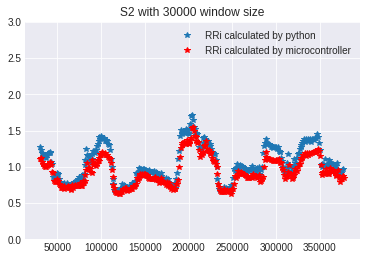

In [26]:
gen_s2_graph("results/takato1__2022-05-23T06_54_00.390510.csv",WS)

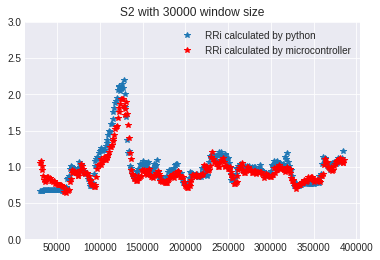

In [27]:
gen_s2_graph("results/chokki1__2022-05-23T07_20_51.710150.csv",WS)

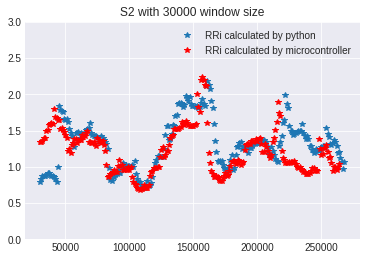

In [28]:
gen_s2_graph("results/chokki1_rel__2022-05-23T07_27_34.402215.csv",WS)

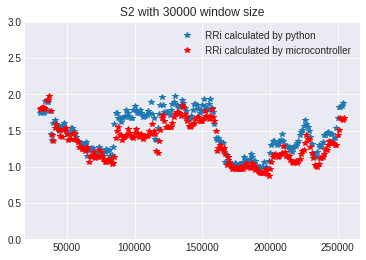

In [29]:
gen_s2_graph("results/art_b__2022-05-20T07_09_41.198756.csv",WS)

In [30]:
def s2_val(cs_filename, window_size = 60000, raw = False):
    """raw argument means taking the rri value calulated my microcontroller"""
    numerical_columns = ["col {}".format(el) for el in range(50)]
    heartrate_file = pandas.read_csv(cs_filename,
                                 names = ["time","rri", "error"]+ numerical_columns)
    

    sample_rate = 250
    only_time = heartrate_file[numerical_columns].stack()
    just_heart = np.array(only_time)
    filtered_ppg = hp.filter_signal(just_heart, 
                                    cutoff = [0.8, 2.5], 
                                    filtertype = 'bandpass',
                                    sample_rate = sample_rate, 
                                    order = 3,
                                    return_top = False)
    
    wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)
    wszystkie_timingi = wd["RR_list"]
    
    timingi_raw = np.array(heartrate_file["rri"][heartrate_file["rri"]!=0])
    if raw:
        return [s2_t(timingi_raw, window_size,tt) for tt in range(window_size, int(sum(wszystkie_timingi)),1000)]

    return [s2_t(wszystkie_timingi, window_size,tt) for tt in range(window_size, int(sum(wszystkie_timingi)),1000)]

    #wykres_czasy = np.array([[tt, s2_t(wszystkie_timingi,window_size,tt)] for tt in range(window_size, int(sum(wszystkie_timingi)),1000)])
    
    

In [31]:
### make s2 distribution
# filelist

import glob
n_focus = glob.glob("heartrate_data/*rel*")
focus = list(set(glob.glob("heartrate_data/*"))- set(n_focus))

# take each file generate list of s2

n_focus_s2 = [s2_val(filn, raw = True) for filn in n_focus]
focus_s2 =  [s2_val(filn, raw = True) for filn in focus]

### put them together

### see distribution?


/home/igor/anaconda3/envs/lab/lib/python3.10/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


array([<AxesSubplot:title={'center':'focused'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'not focused'}, ylabel='Frequency'>],
      dtype=object)

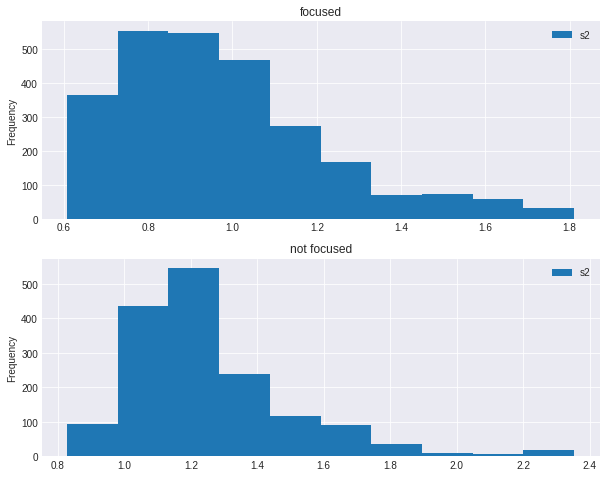

In [32]:
n_focus_df = pandas.DataFrame(sum(n_focus_s2,[]),columns = ["s2"])

n_focus_df["status"] = "not focused"

focus_df = pandas.DataFrame(sum(focus_s2,[]),columns = ["s2"])

focus_df["status"] = "focused"


all_df = pandas.concat([focus_df,n_focus_df])
all_df.plot.hist(column=["s2"], by="status", figsize=(10, 8), bins = 10)

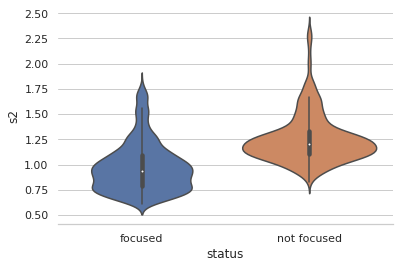

In [33]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=all_df, x="status", y="s2")
sns.despine(left=True)

In [34]:
#!pip install seaborn

/home/igor/anaconda3/envs/lab/lib/python3.10/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


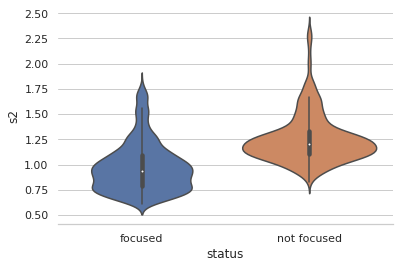

In [35]:
n_focus = glob.glob("heartrate_data/*rel*")
focus = list(set(glob.glob("heartrate_data/*"))- set(n_focus))

def calculate_how_well(n_focus, focus):
    # take each file generate list of s2

    n_focus_s2 = [s2_val(filn, raw = True) for filn in n_focus]
    focus_s2 =  [s2_val(filn, raw = True) for filn in focus]


    n_focus_df = pandas.DataFrame(sum(n_focus_s2,[]),columns = ["s2"])

    n_focus_df["status"] = "not focused"

    focus_df = pandas.DataFrame(sum(focus_s2,[]),columns = ["s2"])

    focus_df["status"] = "focused"


    all_df = pandas.concat([focus_df,n_focus_df])
    #all_df.plot.hist(column=["s2"], by="status", figsize=(10, 8), bins = 20)
    #focus_df.plot.kde(column=["s2"], figsize=(10, 8))
    #n_focus_df.plot.kde(column=["s2"], figsize=(10, 8))
    
    #s for easier comparison
    sns.violinplot(data=all_df, x="status", y="s2")
    sns.despine(left=True)
    
calculate_how_well(n_focus,focus)

In [36]:
glob.glob("heartrate_data/*mori*")

['heartrate_data/mori1_rel__2022-05-23T06_31_23.564297.csv',
 'heartrate_data/mori2_rel__2022-05-23T06_45_23.149977.csv',
 'heartrate_data/mori2__2022-05-23T06_38_23.139399.csv',
 'heartrate_data/mori1__2022-05-23T06_24_10.222504.csv']

In [37]:
glob.glob("heartrate_data/*")

['heartrate_data/igor2__2022-05-23T08_17_31.160075.csv',
 'heartrate_data/igor1__2022-05-23T08_04_20.404223.csv',
 'heartrate_data/takato2_rel__2022-05-23T07_13_13.049281.csv',
 'heartrate_data/takato1_rel__2022-05-23T07_01_01.708743.csv',
 'heartrate_data/takato2__2022-05-23T07_06_22.774917.csv',
 'heartrate_data/mori1_rel__2022-05-23T06_31_23.564297.csv',
 'heartrate_data/mori2_rel__2022-05-23T06_45_23.149977.csv',
 'heartrate_data/igor1_rel__2022-05-23T08_11_38.392172.csv',
 'heartrate_data/igor2_rel__2022-05-23T08_26_05.171297.csv',
 'heartrate_data/chokki2__2022-05-23T07_32_58.445569.csv',
 'heartrate_data/mori2__2022-05-23T06_38_23.139399.csv',
 'heartrate_data/mori1__2022-05-23T06_24_10.222504.csv',
 'heartrate_data/chokki1_rel__2022-05-23T07_27_34.402215.csv',
 'heartrate_data/chokki2_rel__2022-05-23T07_40_01.467545.csv',
 'heartrate_data/takato1__2022-05-23T06_54_00.390510.csv',
 'heartrate_data/chokki1__2022-05-23T07_20_51.710150.csv']

/home/igor/anaconda3/envs/lab/lib/python3.10/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


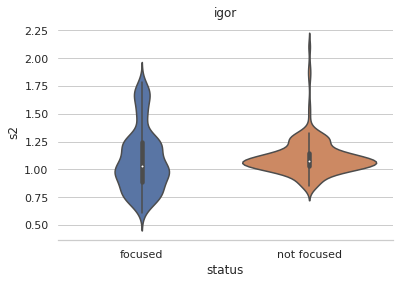

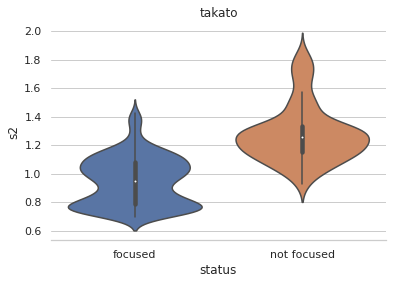

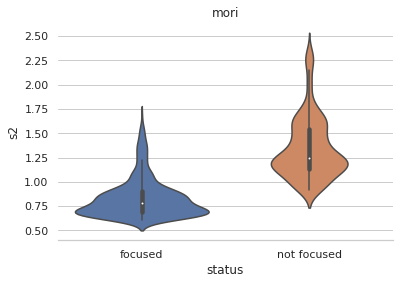

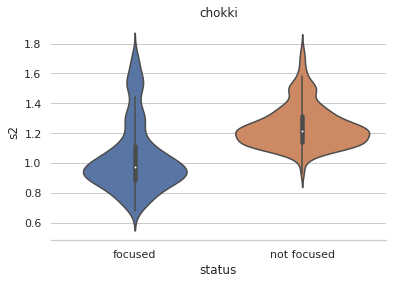

In [38]:
import matplotlib.pyplot as plt

for name in ["igor","takato","mori","chokki"]:

    n_focus = glob.glob(f"heartrate_data/*{name}*rel*")
    #print(n_focus)
    focus = list(set(glob.glob(f"heartrate_data/*{name}*"))- set(n_focus))
    #print(focus)
    calculate_how_well(n_focus,focus)
    plt.title(name)
    plt.show()

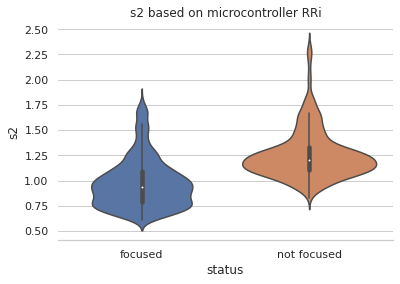

In [39]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=all_df, x="status", y="s2").set(title='s2 based on microcontroller RRi')
sns.despine(left=True)


<AxesSubplot:>

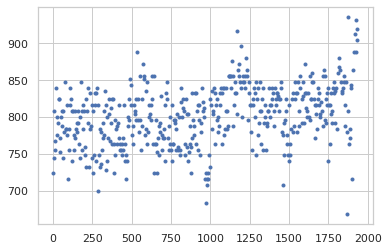

In [40]:
### RRI

heartrate_rri = heartrate_file[["time","rri"]]
heartrate_rri_non = heartrate_rri[heartrate_file["rri"]!=0]
heartrate_rri_non["rri"].plot(style=".")

In [41]:
#!pip install heartpy

data, _ = hp.load_exampledata(0) #this example set is sampled at 100Hz
pandas.DataFrame(data)

,0
0,530.0
1,518.0
2,506.0
3,494.0
4,483.0
...,...
2478,489.0
2479,491.0
2480,492.0
2481,493.0


In [42]:
import numpy as np

np.array(only_time)

array([1234, 1241, 1236, ..., 1302, 1296, 1309])

In [45]:
#heartrate_file = pandas.read_csv("prof_igor__2022-04-27T08_45_26.840386.csv",names = ["time","heartrate"])

In [47]:
#heartrate_file["filtered"]= heartrate_file["heartrate"]


#heartrate_file.plot(x="time",y="heartrate")

In [48]:
from ipywidgets import interact, IntSlider

In [49]:
@interact
def plot(ffrom=IntSlider(min=0, max = 1000, value = 0), tto= IntSlider(min=0, max = len(heartrate_file), value = len(heartrate_file)), offset = IntSlider(min=0, max = len(heartrate_file), value = 0)):
    heartrate_file.iloc[ffrom + offset:tto + offset].plot(y="heartrate",ylim = (0,2500)) # ,style='.'

interactive(children=(IntSlider(value=0, description='ffrom', max=1000), IntSlider(value=1937, description='tt…

In [50]:
def feat_t(signal_peaks, window_size,t):
    absolute_times = np.cumsum(signal_peaks)
    
    
    
    filtered_times = (peak for peak,time in zip(signal_peaks,absolute_times) if t-window_size<time<=t)
    return s2_nn_ssd(filtered_times)

import functools
    
@functools.lru_cache    
def s2_nn_ssd(filtered_times):
    time_domain_features = get_time_domain_features(list(filtered_times))
    return time_domain_features["sdnn"]/time_domain_features["rmssd"],time_domain_features["sdnn"], time_domain_features["rmssd"]

In [51]:
def calculate_features(cs_filename, window_size = 60000, raw = False):
    """raw argument means taking the rri value calulated my microcontroller"""
    numerical_columns = ["col {}".format(el) for el in range(50)]
    heartrate_file = pandas.read_csv(cs_filename,
                                 names = ["time","rri", "error"]+ numerical_columns)
    

    sample_rate = 250
    only_time = heartrate_file[numerical_columns].stack()
    just_heart = np.array(only_time)
    filtered_ppg = hp.filter_signal(just_heart, 
                                    cutoff = [0.8, 2.5], 
                                    filtertype = 'bandpass',
                                    sample_rate = sample_rate, 
                                    order = 3,
                                    return_top = False)
    
    wd, m = hp.process(filtered_ppg, sample_rate=sample_rate,
                  high_precision = True)
    wszystkie_timingi = wd["RR_list"]
    
    timingi_raw = np.array(heartrate_file["rri"][heartrate_file["rri"]!=0])
    if raw:
        return [feat_t(timingi_raw, window_size,tt) for tt in range(window_size, int(sum(wszystkie_timingi)),1000)]

    return [feat_t(wszystkie_timingi, window_size,tt) for tt in range(window_size, int(sum(wszystkie_timingi)),1000)]

    #wykres_czasy = np.array([[tt, s2_t(wszystkie_timingi,window_size,tt)] for tt in range(window_size, int(sum(wszystkie_timingi)),1000)])
    
    

In [ ]:
!pip install tqdm

In [52]:
from tqdm.notebook import tqdm as tqdm_notebook


In [53]:
glob.glob("heartrate_data/*")

names = ["igor","takato","mori","chokki"]

names1 = [f"{name}1" for name in names]
names1

['igor1', 'takato1', 'mori1', 'chokki1']

In [54]:
#any(names1 in "fufu")

TypeError: 'in <string>' requires string as left operand, not list

In [55]:
all_persons = []
for filepath in tqdm_notebook(glob.glob("heartrate_data/*.csv")):
    

    filedf = pandas.DataFrame(calculate_features(filepath, raw= True),
                 columns = ["s2","sdnn","rmsdd"])
    filedf["rel"] = "rel" in filepath
    filedf["num"]= 1 if any(name in filepath for name in names1) else 2
    all_persons.append(filedf)

all_persons_pandas  = pandas.concat(all_persons)

  0%|          | 0/16 [00:00<?, ?it/s]

/home/igor/anaconda3/envs/lab/lib/python3.10/site-packages/scipy/interpolate/fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [56]:
all_first = all_persons_pandas[all_persons_pandas["num"]==1]

samp = all_first.sample(40, random_state = 7)

import numpy as np
X = np.array(samp[["s2","sdnn","rmsdd"]])
y = np.array(samp["rel"])

all_second = all_persons_pandas[all_persons_pandas["num"]==2]
X_test = np.array(all_second[["s2","sdnn","rmsdd"]])
y_test = np.array(all_second["rel"])



In [57]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, recall_score, accuracy_score


#X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
#y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#clf = make_pipeline(StandardScaler(), SVC(C= 137.21434895138685,
# class_weight= 'balanced',
# gamma= 7.588635592879182e-05,
# kernel= 'rbf'))
clf.fit(X, y)
#clf.get_params().keys()

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [58]:
clf.predict(X[:1,:])

array([False])

In [59]:
y[0]

False

In [60]:
clf.score(X,y)

0.9

In [61]:
clf.score(X_test,y_test)

0.7289156626506024

In [62]:
y_pred = clf.predict(X_test)

In [63]:
f1 = f1_score(y_test,y_pred) 
print(f1,  recall_score(y_test,y_pred), accuracy_score(y_test,y_pred))

0.5854004252303331 0.48933649289099523 0.7289156626506024


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


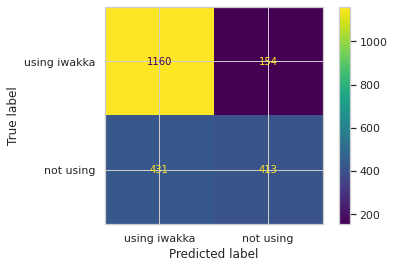

In [65]:
%matplotlib inline
conff = ConfusionMatrixDisplay(confusion_matrix =  confusion_matrix(y_test,y_pred),
                              display_labels=  ["using iwakka","not using"])
conff.plot()

In [66]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import scipy
import time

In [67]:
param_dist = {'svc__C': scipy.stats.expon(scale=100), 'svc__gamma': scipy.stats.expon(scale=.1),
  'svc__kernel': ['rbf'], 'svc__class_weight':['balanced', None]}

# run randomized search
n_iter_search = 45
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

start = time.time()
random_search.fit(X, y)

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(gamma='auto'))]),
                   n_iter=45,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d11587b80>,
                                        'svc__class_weight': ['balanced', None],
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8d115ceef0>,
                                        'svc__kernel': ['rbf']})

In [68]:
random_search.score(X_test,y_test)

0.7743280815569972

In [69]:
random_search.score(X,y)

0.925

In [70]:
random_search.best_params_

{'svc__C': 28.986446460231775,
 'svc__class_weight': 'balanced',
 'svc__gamma': 0.015028809528559986,
 'svc__kernel': 'rbf'}

In [71]:
random_search.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=28.986446460231775, class_weight='balanced',
                     gamma=0.015028809528559986))])

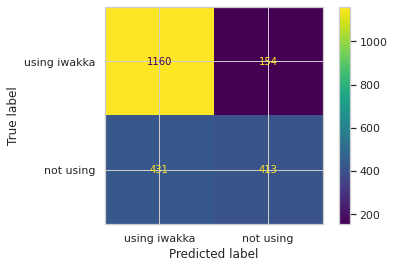

In [72]:
y_pred_f = random_search.predict(X_test)
conff = ConfusionMatrixDisplay(confusion_matrix =  confusion_matrix(y_test,y_pred),
                              display_labels=  ["using iwakka","not using"])
conff.plot()

In [73]:
f1_score(y_test,y_pred_f)

0.7160349854227405

In [74]:
print(f1_score(y_test,y_pred_f),  recall_score(y_test,y_pred_f), accuracy_score(y_test,y_pred_f))
print(f1_score(y_test,y_pred),  recall_score(y_test,y_pred), accuracy_score(y_test,y_pred))


0.7160349854227405 0.7274881516587678 0.7743280815569972
0.5854004252303331 0.48933649289099523 0.7289156626506024
